# 2023-24 NBA Analysis: Boston Celtics vs. Dallas Mavericks

### Introduction

This Jupyter Notebook aims to analyze the performances of the Boston Celtics and Dallas Mavericks over the 2023-24 NBA regular season and playoffs, through using data analysis and visualization techniques. Moreover, the database is versatile, and this notebook can be repurposed to analyze the performance of any player or team using data stored in an SQLite database sourced from the official NBA website through a web-scraper.

### Table of Contents

1. Imports, Preparation, and Setup
2. Roster and Relevant Statistics
3. Glossary
4. Players
5. Top Players Season Comparison
6. Scoring Efficiency
7.  Player Contribution
8.  Conclusion

### Imports, Preparation, and Setup

Before we begin, we need to import the relevant Python libraries required for the data analysis, such as MatPlotLib. An additional library called Aquarel was also imported to alter the default color schemes and make data visualization look nicer.

In [119]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns
import numpy as np

In [120]:
from aquarel import load_theme
theme = load_theme("umbra_light")
theme.apply()
plt.rcParams['font.family'] = 'SF Pro Display'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Set the font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'semibold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [121]:
# Connects to the local database file.
conn = sqlite3.connect('nba_database.db')

# Converting it to a dataframe to use it with the libraries.
oct = pd.read_sql_query('SELECT * FROM reg_month_1', conn)
nov = pd.read_sql_query('SELECT * FROM reg_month_2', conn)
dec = pd.read_sql_query('SELECT * FROM reg_month_3', conn)
jan = pd.read_sql_query('SELECT * FROM reg_month_4', conn)
feb = pd.read_sql_query('SELECT * FROM reg_month_5', conn)
mar = pd.read_sql_query('SELECT * FROM reg_month_6', conn)
apr_reg = pd.read_sql_query('SELECT * FROM reg_month_7', conn)
apr_pla = pd.read_sql_query('SELECT * FROM pla_month_7', conn)
may = pd.read_sql_query('SELECT * FROM pla_month_8', conn)
jun = pd.read_sql_query('SELECT * FROM pla_month_9', conn)

reg = pd.read_sql_query('SELECT * FROM regular_season', conn)
pla = pd.read_sql_query('SELECT * FROM playoffs', conn)

# So that all columns are visible.
pd.set_option('display.max_columns', None)

### Roster and Relevant Statistics

Our analysis begins with a look at the various tables containing player statistics and the roster of the two teams we will be examining. These tables capture a wide range of metrics that will aid our in-depth analysis of player and team performance throughout the season. These two tables highlight relevant statistics involved on an individual-player level. Moreover, by default, the tables are ordered from the highest-scoring player to the lowest. All data has been thoroughly checked beforehand, ensuring that no null values or incorrect datatypes are present.

In [124]:
# Obtains player data for the Boston Celtics.
pla[pla['TEAM'] == 'BOS']

,NAME,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
14,Jayson Tatum,BOS,26,19,16,3,40.4,25.0,8.4,19.6,42.7,2.1,7.3,28.3,6.2,7.2,86.1,0.9,8.8,9.7,6.3,2.6,1.1,0.7,2.8,48.6,14.0,1.0,7.7
16,Jaylen Brown,BOS,27,19,16,3,37.2,23.9,9.2,17.8,51.6,1.9,5.8,32.7,3.6,5.4,66.0,1.2,4.8,5.9,3.3,2.7,1.2,0.6,2.7,38.8,0.0,0.0,4.6
34,Derrick White,BOS,29,19,16,3,35.6,16.7,5.7,12.7,45.2,3.4,8.5,40.4,1.8,2.0,92.1,1.0,3.3,4.3,4.1,0.8,0.9,1.2,2.3,33.6,0.0,0.0,3.5
52,Jrue Holiday,BOS,34,19,16,3,37.9,13.2,5.1,10.2,50.3,1.8,4.6,40.2,1.1,1.2,95.5,1.9,4.2,6.1,4.4,1.5,1.1,0.6,2.1,30.7,3.0,0.0,7.5
57,Kristaps Porzingis,BOS,28,7,6,1,23.5,12.3,4.0,8.6,46.7,1.4,4.1,34.5,2.9,3.1,90.9,0.6,3.9,4.4,1.1,0.7,0.7,1.6,2.1,25.5,0.0,0.0,5.6
74,Al Horford,BOS,38,19,16,3,30.3,9.2,3.5,7.3,47.8,1.8,5.0,36.8,0.4,0.6,63.6,1.8,5.2,7.0,2.1,0.6,0.8,0.8,1.5,25.0,1.0,0.0,7.4
94,Payton Pritchard,BOS,26,19,16,3,18.7,6.4,2.3,5.5,41.9,1.2,3.2,38.3,0.6,0.6,91.7,0.7,1.2,1.9,2.1,0.7,0.2,0.0,1.2,11.8,0.0,0.0,1.5
111,Sam Hauser,BOS,26,19,16,3,14.9,5.4,1.9,4.4,42.9,1.4,3.7,38.0,0.2,0.2,100.0,0.4,1.7,2.2,0.6,0.2,0.3,0.2,1.1,10.0,0.0,0.0,4.5
140,Luke Kornet,BOS,28,13,11,2,10.2,3.0,1.1,1.6,66.7,0.0,0.0,0.0,0.8,1.0,84.6,1.5,1.7,3.2,0.5,0.5,0.1,0.4,0.8,8.5,0.0,0.0,-1.3
165,Oshae Brissett,BOS,26,10,8,2,5.5,1.6,0.6,1.1,54.5,0.2,0.2,100.0,0.2,0.4,50.0,0.3,1.1,1.4,0.0,0.1,0.3,0.2,0.2,4.7,0.0,0.0,1.0


In [125]:
# Obtains player data for the Dallas Mavericks.
pla[pla['TEAM'] == 'DAL']

,NAME,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
6,Luka Doncic,DAL,25,22,13,9,40.9,28.9,10.2,22.9,44.6,3.1,9.6,32.2,5.3,7.0,76.5,0.7,8.7,9.5,8.1,4.1,1.9,0.4,2.5,54.9,16.0,7.0,4.4
18,Kyrie Irving,DAL,32,22,13,9,40.0,22.1,8.5,18.1,46.7,2.4,6.2,39.0,2.8,3.3,84.9,1.0,2.7,3.7,5.1,2.3,1.0,0.3,2.8,36.0,0.0,0.0,5.1
54,P.J. Washington,DAL,25,22,13,9,35.7,13.0,4.5,10.6,42.7,2.1,6.1,34.8,1.8,2.5,70.9,1.5,5.1,6.6,1.4,1.5,0.7,0.8,3.0,26.1,3.0,0.0,2.2
75,Derrick Jones Jr.,DAL,27,22,13,9,29.4,9.1,3.5,7.3,48.1,1.1,3.0,36.9,1.0,1.4,73.3,1.5,2.0,3.5,1.2,0.8,0.5,1.0,2.5,18.6,0.0,0.0,2.0
78,Daniel Gafford,DAL,25,22,13,9,20.2,9.0,3.5,5.6,63.4,0.0,0.0,0.0,1.9,3.0,63.1,1.9,3.6,5.5,0.7,0.9,0.3,1.5,1.7,21.1,1.0,0.0,-2.1
86,Dereck Lively II,DAL,20,21,13,8,22.0,7.9,3.0,4.5,67.4,0.0,0.0,100.0,1.7,2.9,59.0,2.7,4.7,7.4,1.3,1.0,0.4,1.0,2.3,21.8,4.0,0.0,4.7
117,Josh Green,DAL,23,22,13,9,18.1,5.0,1.6,3.9,42.4,1.0,2.7,39.0,0.6,0.9,73.7,1.0,1.6,2.5,1.0,0.3,0.8,0.1,1.3,12.0,0.0,0.0,0.1
121,Tim Hardaway Jr.,DAL,32,14,8,6,12.7,4.4,1.6,4.1,37.9,0.9,2.6,35.1,0.3,0.6,50.0,0.1,1.6,1.8,0.4,0.1,0.4,0.1,0.7,8.2,0.0,0.0,-2.5
123,Jaden Hardy,DAL,21,19,11,8,6.8,4.2,1.5,3.6,42.6,0.6,1.4,40.7,0.6,0.8,73.3,0.1,0.7,0.8,0.9,0.4,0.2,0.0,0.7,6.6,0.0,0.0,-1.2
128,Maxi Kleber,DAL,32,13,6,7,16.8,3.7,1.2,3.0,41.0,0.9,2.2,42.9,0.3,0.5,66.7,0.3,1.6,1.9,1.0,0.4,0.2,0.3,1.5,8.7,0.0,0.0,1.0


### Glossary

Provided below is a list of key terms relating to the columns of our datasets. Understanding these will help better interpret the analysis portion.

| Column  | Description                    | Column  | Description                    |
|:--------|:-------------------------------|:--------|:-------------------------------|
| NAME    | Player's Name                  | FTM     | Free Throws Made               |
| TEAM    | Player's Team                  | FTA     | Free Throws Attempted          |
| AGE     | Player's Age                   | FT%     | Free Throw Percentage          |
| GP      | Games Played                   | OREB    | Offensive Rebounds             |
| W       | Wins                           | DREB    | Defensive Rebounds             |
| L       | Losses                         | REB     | Rebounds                       |
| MIN     | Minutes Played                 | AST     | Assists                        |
| PTS     | Points                         | TOV     | Turnovers                      |
| FGM     | Field Goals Made               | STL     | Steals                         |
| FGA     | Field Goals Attempted          | BLK     | Blocks                         |
| FG%     | Field Goal Percentage          | PF      | Personal Fouls                 |
| 3PM     | 3 Point Field Goals Made       | FP      | Fantasy Points                 |
| 3PA     | 3 Point Field Goals Attempted  | DD2     | Double Doubles                 |
| 3P%     | 3 Point Field Goal Percentage  | TD3     | Triple Doubles                 |
| +/-     | Plus-Minus                     |         |                                |

### Key Players

We can start by identifying the standout performers on both teams. The following table and pie chart will highlight their scores and also how much each player contributes to their team.

In [131]:
# Boston Celtics: Regualer Season
reg_bos = reg[reg['TEAM'] == 'BOS']
reg_bos.head(7)

,NAME,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
7,Jayson Tatum,BOS,26,74,57,17,35.7,26.9,9.1,19.3,47.1,3.1,8.2,37.6,5.6,6.7,83.3,0.9,7.2,8.1,4.9,2.5,1.0,0.6,2.0,46.2,25.0,0.0,8.2
26,Jaylen Brown,BOS,27,70,52,18,33.5,23.0,9.0,17.9,49.9,2.1,5.9,35.4,3.0,4.3,70.3,1.2,4.3,5.5,3.6,2.4,1.2,0.5,2.6,37.7,6.0,1.0,5.9
48,Kristaps Porzingis,BOS,28,57,43,14,29.6,20.1,6.8,13.2,51.6,1.9,5.1,37.5,4.5,5.3,85.8,1.7,5.5,7.2,2.0,1.6,0.7,1.9,2.7,38.2,13.0,0.0,7.3
94,Derrick White,BOS,29,73,58,15,32.6,15.2,5.3,11.5,46.1,2.7,6.8,39.6,1.9,2.1,90.1,0.7,3.5,4.2,5.2,1.5,1.0,1.2,2.1,33.1,5.0,1.0,8.5
129,Jrue Holiday,BOS,34,69,53,16,32.8,12.5,4.8,10.0,48.0,2.0,4.7,42.9,0.9,1.0,83.3,1.2,4.2,5.4,4.8,1.8,0.9,0.8,1.6,29.3,7.0,0.0,6.2
191,Payton Pritchard,BOS,26,82,64,18,22.3,9.6,3.6,7.7,46.8,1.8,4.7,38.5,0.6,0.7,82.1,0.9,2.4,3.2,3.4,0.7,0.5,0.1,1.3,19.5,3.0,0.0,5.5
202,Sam Hauser,BOS,26,79,62,17,22.0,9.0,3.2,7.1,44.6,2.5,5.9,42.4,0.2,0.2,89.5,0.6,2.9,3.5,1.0,0.4,0.5,0.3,1.3,16.8,0.0,0.0,6.2


In [132]:
# Boston Celtics: Playoffs
pla_bos = pla[pla['TEAM'] == 'BOS']
pla_bos.head(7)

,NAME,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
14,Jayson Tatum,BOS,26,19,16,3,40.4,25.0,8.4,19.6,42.7,2.1,7.3,28.3,6.2,7.2,86.1,0.9,8.8,9.7,6.3,2.6,1.1,0.7,2.8,48.6,14.0,1.0,7.7
16,Jaylen Brown,BOS,27,19,16,3,37.2,23.9,9.2,17.8,51.6,1.9,5.8,32.7,3.6,5.4,66.0,1.2,4.8,5.9,3.3,2.7,1.2,0.6,2.7,38.8,0.0,0.0,4.6
34,Derrick White,BOS,29,19,16,3,35.6,16.7,5.7,12.7,45.2,3.4,8.5,40.4,1.8,2.0,92.1,1.0,3.3,4.3,4.1,0.8,0.9,1.2,2.3,33.6,0.0,0.0,3.5
52,Jrue Holiday,BOS,34,19,16,3,37.9,13.2,5.1,10.2,50.3,1.8,4.6,40.2,1.1,1.2,95.5,1.9,4.2,6.1,4.4,1.5,1.1,0.6,2.1,30.7,3.0,0.0,7.5
57,Kristaps Porzingis,BOS,28,7,6,1,23.5,12.3,4.0,8.6,46.7,1.4,4.1,34.5,2.9,3.1,90.9,0.6,3.9,4.4,1.1,0.7,0.7,1.6,2.1,25.5,0.0,0.0,5.6
74,Al Horford,BOS,38,19,16,3,30.3,9.2,3.5,7.3,47.8,1.8,5.0,36.8,0.4,0.6,63.6,1.8,5.2,7.0,2.1,0.6,0.8,0.8,1.5,25.0,1.0,0.0,7.4
94,Payton Pritchard,BOS,26,19,16,3,18.7,6.4,2.3,5.5,41.9,1.2,3.2,38.3,0.6,0.6,91.7,0.7,1.2,1.9,2.1,0.7,0.2,0.0,1.2,11.8,0.0,0.0,1.5


In [133]:
# Dallas Mavericks: Regular Season
reg_dal = reg[reg['TEAM'] == 'DAL']
reg_dal.head(7)

,NAME,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
1,Luka Doncic,DAL,25,70,46,24,37.5,33.9,11.5,23.6,48.7,4.1,10.6,38.2,6.8,8.7,78.6,0.8,8.4,9.2,9.8,4.0,1.4,0.5,2.1,61.5,49.0,21.0,4.6
16,Kyrie Irving,DAL,32,58,39,19,35.0,25.6,9.7,19.5,49.7,3.0,7.3,41.1,3.3,3.6,90.5,0.8,4.2,5.0,5.2,1.8,1.3,0.5,1.9,42.8,5.0,0.0,4.8
103,Tim Hardaway Jr.,DAL,32,79,49,30,26.8,14.4,5.0,12.4,40.2,2.7,7.6,35.3,1.8,2.1,85.2,0.3,2.9,3.2,1.8,0.9,0.5,0.1,1.3,21.9,0.0,0.0,0.2
124,P.J. Washington,DAL,25,73,30,43,30.4,12.9,4.8,11.1,43.6,1.8,5.7,32.0,1.4,2.0,68.3,1.2,4.5,5.6,1.9,1.3,1.0,0.8,2.3,26.6,4.0,0.0,-1.8
156,Daniel Gafford,DAL,25,74,30,44,24.5,11.0,4.7,6.5,72.5,0.0,0.0,0.0,1.6,2.4,67.4,2.6,5.0,7.6,1.6,1.0,0.9,2.1,3.1,30.3,15.0,0.0,-1.4
207,Dereck Lively II,DAL,20,55,35,20,23.5,8.8,4.0,5.4,74.7,0.0,0.0,0.0,0.7,1.5,50.6,2.5,4.4,6.9,1.1,0.9,0.7,1.4,2.6,23.9,8.0,0.0,2.6
210,Derrick Jones Jr.,DAL,27,76,47,29,23.5,8.6,3.1,6.5,48.3,1.1,3.1,34.3,1.3,1.8,71.3,1.1,2.2,3.3,1.0,0.9,0.7,0.7,1.6,17.3,2.0,0.0,0.7


In [134]:
# Dallas Mavericks: Playoffs
pla_dal = pla[pla['TEAM'] == 'DAL']
pla_dal.head(7)

,NAME,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
6,Luka Doncic,DAL,25,22,13,9,40.9,28.9,10.2,22.9,44.6,3.1,9.6,32.2,5.3,7.0,76.5,0.7,8.7,9.5,8.1,4.1,1.9,0.4,2.5,54.9,16.0,7.0,4.4
18,Kyrie Irving,DAL,32,22,13,9,40.0,22.1,8.5,18.1,46.7,2.4,6.2,39.0,2.8,3.3,84.9,1.0,2.7,3.7,5.1,2.3,1.0,0.3,2.8,36.0,0.0,0.0,5.1
54,P.J. Washington,DAL,25,22,13,9,35.7,13.0,4.5,10.6,42.7,2.1,6.1,34.8,1.8,2.5,70.9,1.5,5.1,6.6,1.4,1.5,0.7,0.8,3.0,26.1,3.0,0.0,2.2
75,Derrick Jones Jr.,DAL,27,22,13,9,29.4,9.1,3.5,7.3,48.1,1.1,3.0,36.9,1.0,1.4,73.3,1.5,2.0,3.5,1.2,0.8,0.5,1.0,2.5,18.6,0.0,0.0,2.0
78,Daniel Gafford,DAL,25,22,13,9,20.2,9.0,3.5,5.6,63.4,0.0,0.0,0.0,1.9,3.0,63.1,1.9,3.6,5.5,0.7,0.9,0.3,1.5,1.7,21.1,1.0,0.0,-2.1
86,Dereck Lively II,DAL,20,21,13,8,22.0,7.9,3.0,4.5,67.4,0.0,0.0,100.0,1.7,2.9,59.0,2.7,4.7,7.4,1.3,1.0,0.4,1.0,2.3,21.8,4.0,0.0,4.7
117,Josh Green,DAL,23,22,13,9,18.1,5.0,1.6,3.9,42.4,1.0,2.7,39.0,0.6,0.9,73.7,1.0,1.6,2.5,1.0,0.3,0.8,0.1,1.3,12.0,0.0,0.0,0.1


### Top Players Season Comparison

As we've already seen, both teams seem to have two star players across both the regular season and the playoffs: Jayson Tatum and Jaylen Brown on the Celtics, and Luka Dončić and Kyrie Irving on the Mavericks. The following is a line-chart which tracks these key players and their points per game over the season. This will allow us to closely analyze their overall progress this year: hot-streaks and slumps, rises and declines, and so on.

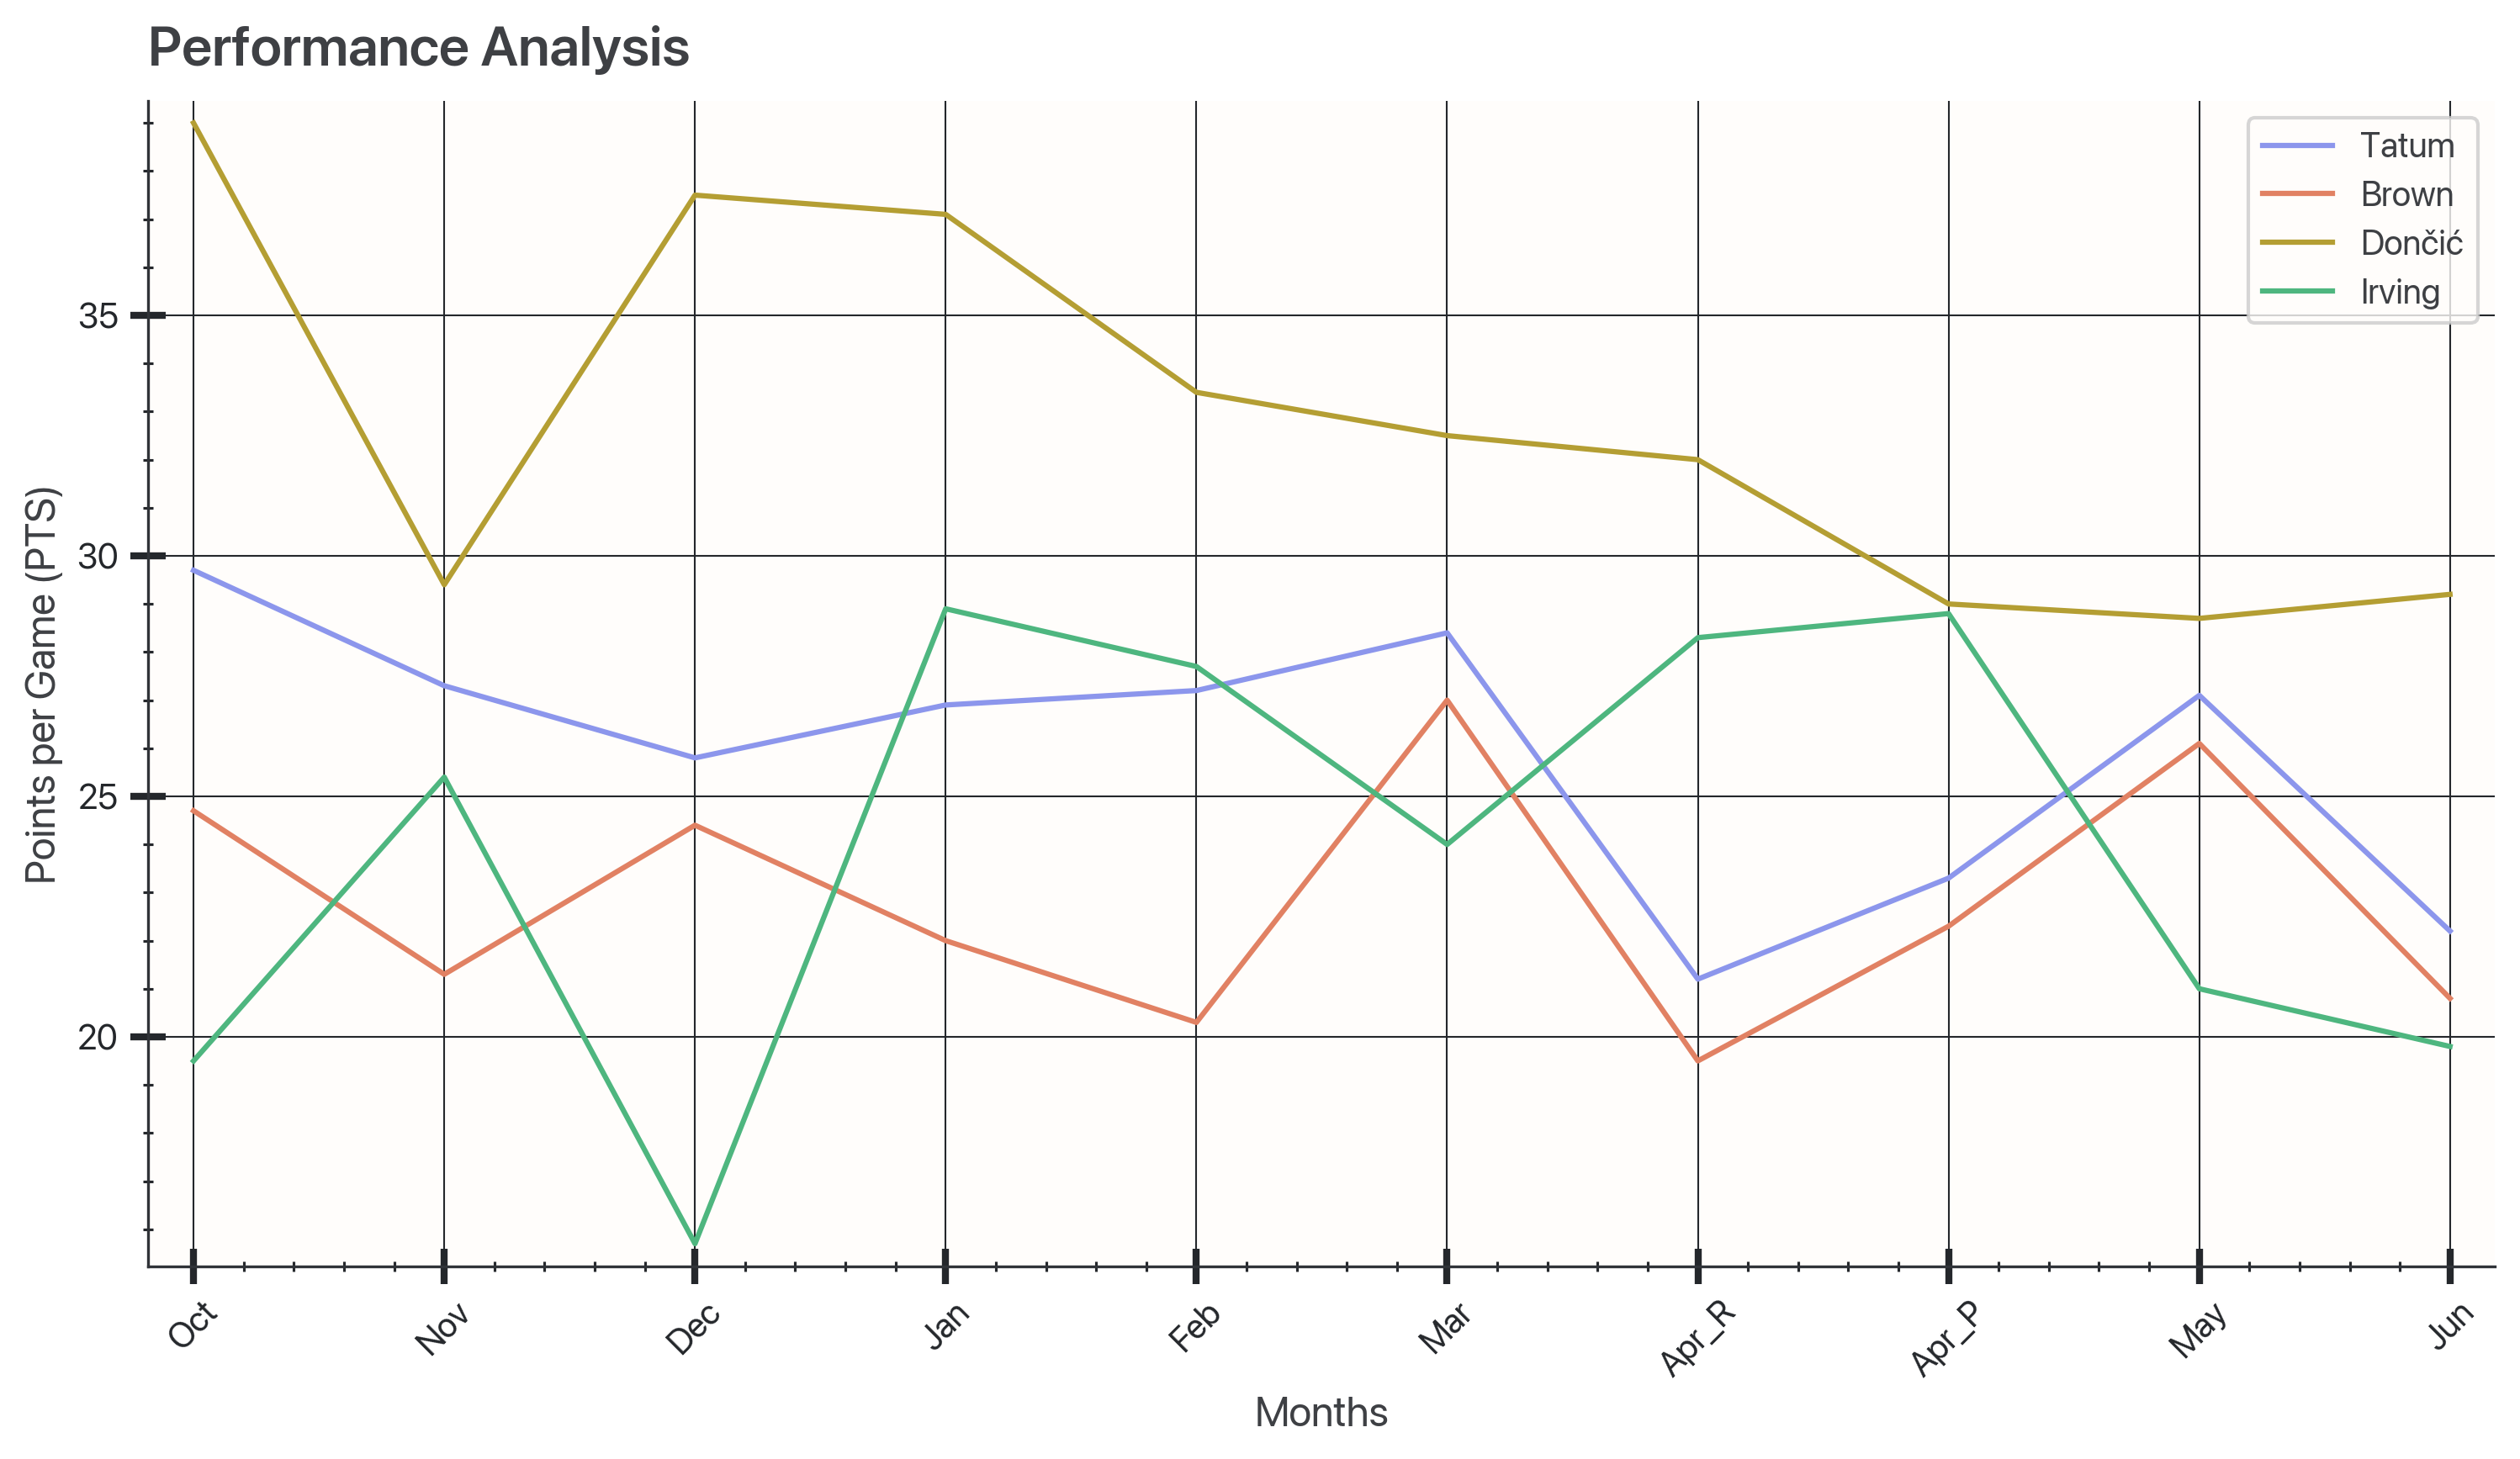

In [137]:
months = [oct, nov, dec, jan, feb, mar, apr_reg, apr_pla, may, jun]
tatum_x = []
brown_x = []
doncic_x = []
irving_x = []
y = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr_R', 'Apr_P', 'May', 'Jun']

for month in months:
    tatum_x.append(month[month['NAME'] == 'Jayson Tatum']['PTS'])
    brown_x.append(month[month['NAME'] == 'Jaylen Brown']['PTS'])
    doncic_x.append(month[month['NAME'] == 'Luka Doncic']['PTS'])
    irving_x.append(month[month['NAME'] == 'Kyrie Irving']['PTS'])

plt.figure(figsize=(12, 6))
plt.plot(y, tatum_x, label='Tatum')
plt.plot(y, brown_x, label='Brown')
plt.plot(y, doncic_x, label='Dončić')
plt.plot(y, irving_x, label='Irving')

plt.title('Performance Analysis')
plt.xlabel('Months')
plt.ylabel('Points per Game (PTS)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.show()

From the diagram above, we can easily determine that Luka Dončić is a scoring powerhouse and a force to be reckoned with. He has consistently performed well, with his averages dropping to the high 20s as his lowest. His weakest scoring average was post-April, which could simply be attributed to the intense playoffs competition. Meanwhile, Kyrie Irving's season is marked by fluctuating performance levels, with different stretches being accompanied by frequent peaks and dips. Despite that, he largely remains on the same level as his opponents, Jayson Tatum and Jaylen Brown, barring a remarkably performance in December.

Jayson Tatum exhibits a stable, consistent regular season performance, which was quickly followed by a steep decline in the late season, but quickly picked up momentum by the height of the playoffs. Jaylen Brown's season was similarly consistent. A little bit more variable that Tatum's, but consistent nonetheless, remaining in the low to mid-20s throughout. From March onwards, he began to closely mirror Tatum's performance trends.

On a broader scale, it can be inferred that Dončić and Irving have alternating peaks and dips when it comes to their performances. This can suggest an awkward balance where one compensates for the other's lacking performance. While they seem to cover each other's strengths and weaknesses, this can potentially suggest that there's less cohesion between the two star players and a reliance on individual skill. Conversely, Tatum and Brown demonstrate a lot more syncrhony, which was particularly evident during the playoffs.

### Scoring Efficiency

Now, let's focus on the teams themselves rather than individual players. In basketball, players who score more points tend to have a higher field goal percentage, which are the statistics which we will be mapping on a scatter plot to observe the relationship of. This reason for this relationship is simple: players who are more efficient at shooting will have a higher field goal percentage, and hence, score more points. Though we will soon see that their relationship isn't entirely linear. Some shoots could have a low field goal percentage, but because they shoot at such a high volume, they naturally have more points, and vice versa.

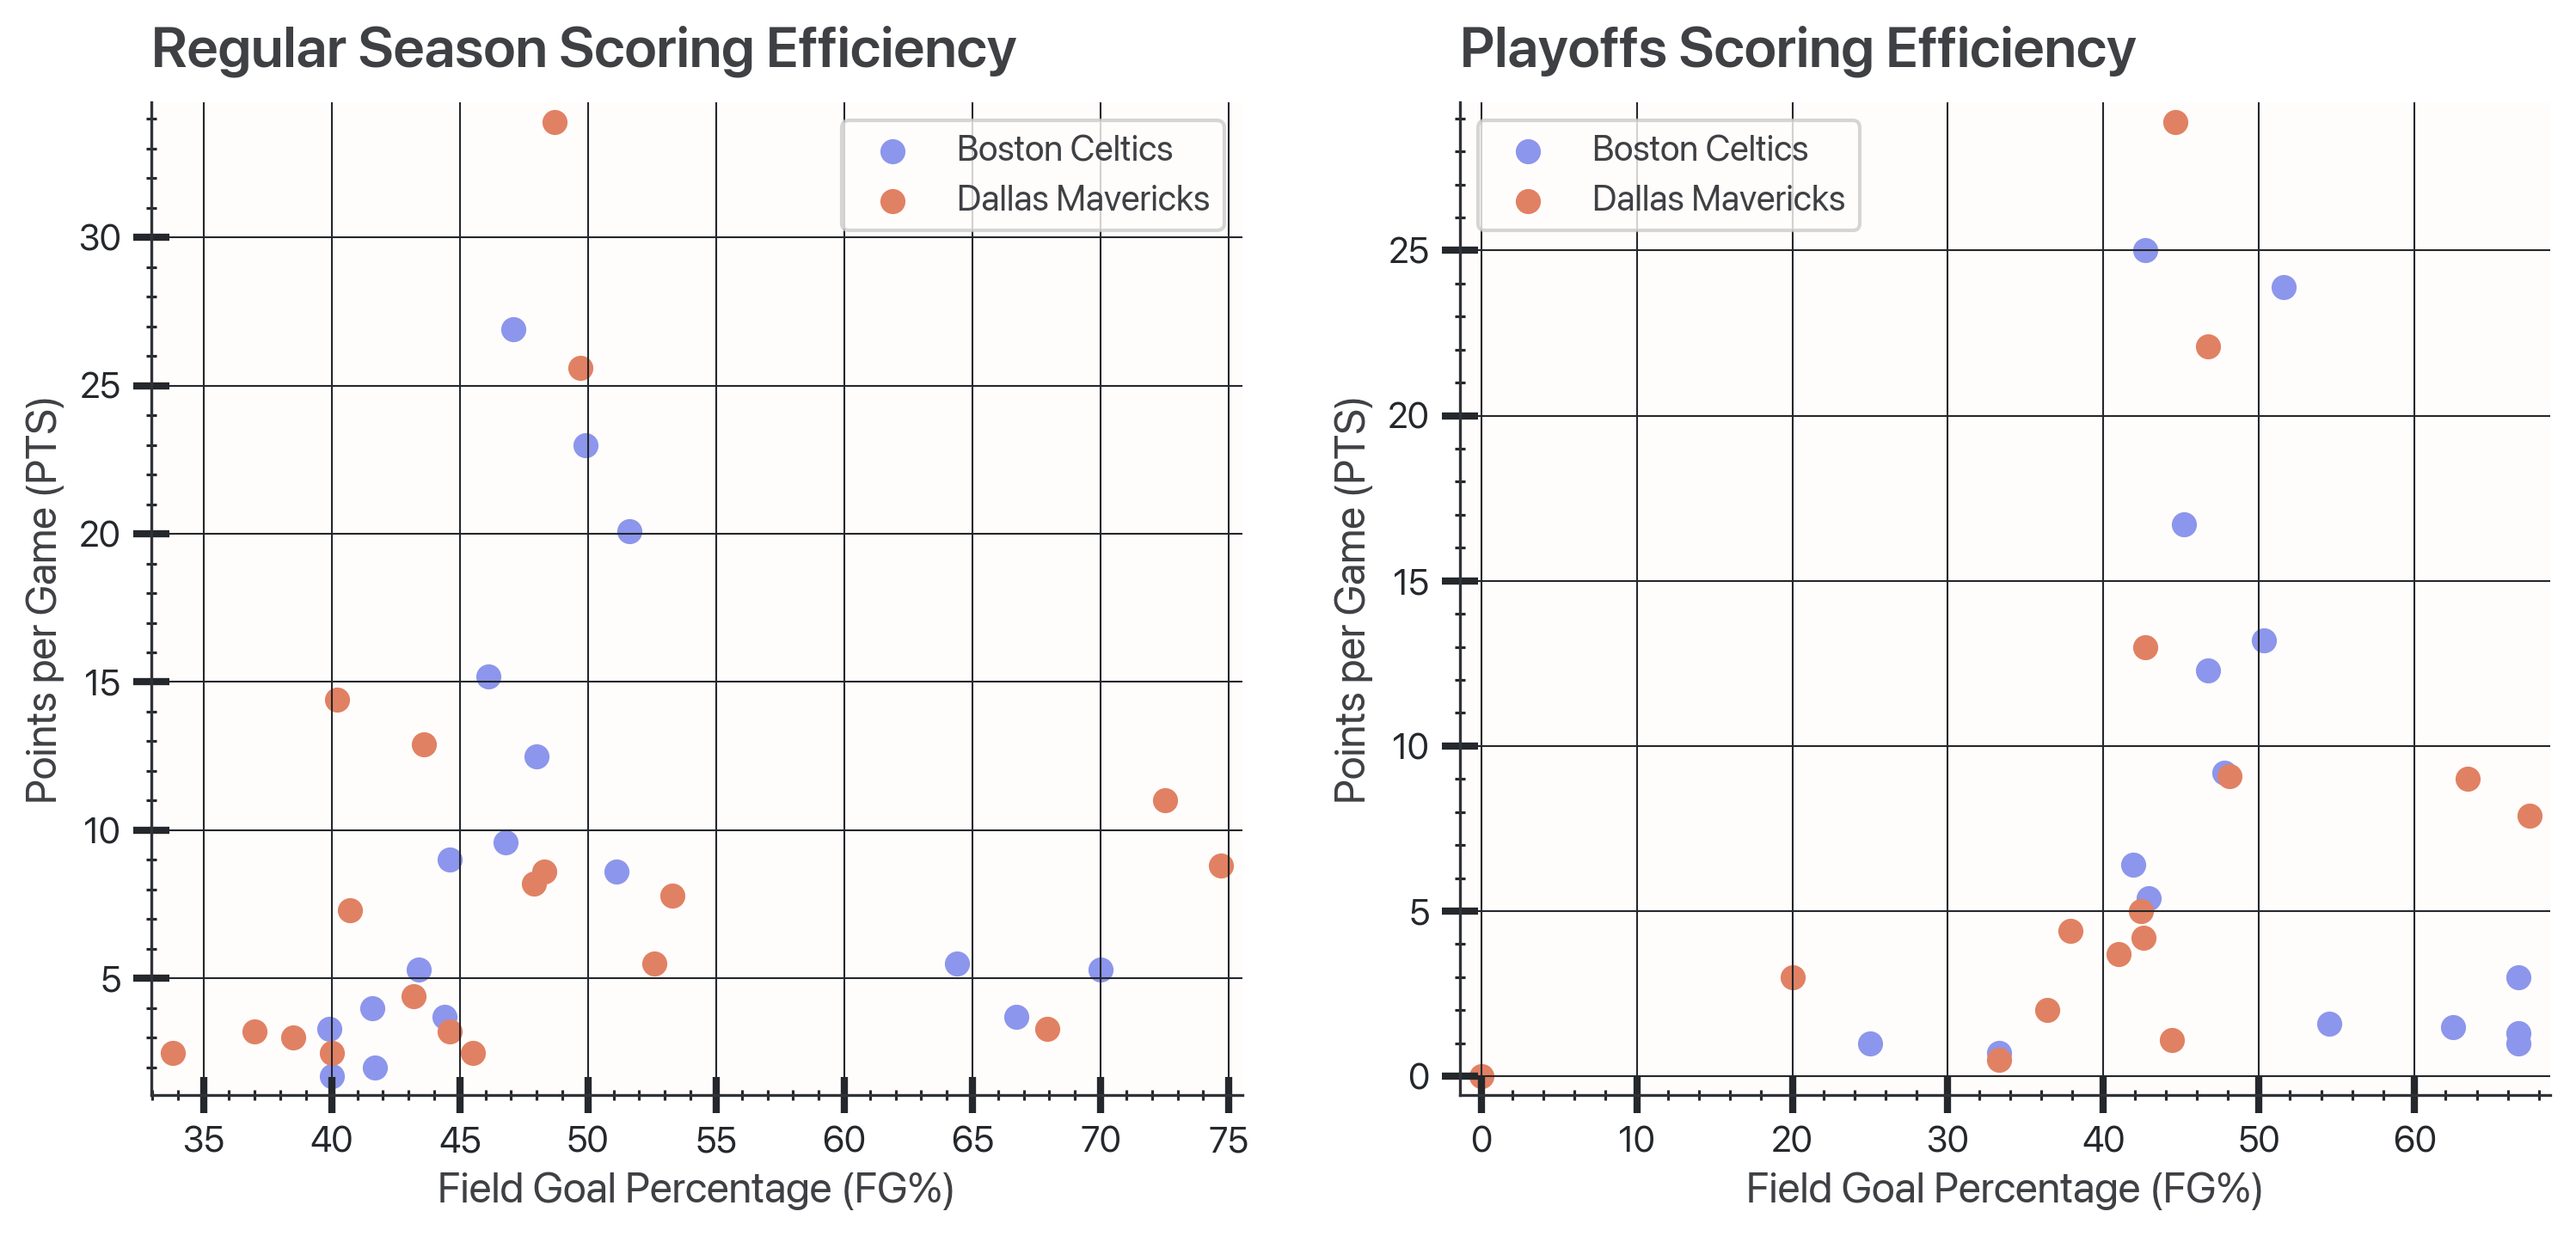

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bos_reg_pts = reg_bos['PTS'].tolist()
bos_reg_fgp = reg_bos['FG%'].tolist()
dal_reg_pts = reg_dal['PTS'].tolist()
dal_reg_fgp = reg_dal['FG%'].tolist()

ax1.scatter(bos_reg_fgp, bos_reg_pts, label='Boston Celtics')
ax1.scatter(dal_reg_fgp, dal_reg_pts, label='Dallas Mavericks')

ax1.set_xlabel('Field Goal Percentage (FG%)')
ax1.set_ylabel('Points per Game (PTS)')
ax1.set_title('Regular Season Scoring Efficiency')
ax1.legend()

bos_pla_pts = pla_bos['PTS'].tolist()
bos_pla_fgp = pla_bos['FG%'].tolist()
dal_pla_pts = pla_dal['PTS'].tolist()
dal_pla_fgp = pla_dal['FG%'].tolist()

ax2.scatter(bos_pla_fgp, bos_pla_pts, label='Boston Celtics')
ax2.scatter(dal_pla_fgp, dal_pla_pts, label='Dallas Mavericks')

ax2.set_xlabel('Field Goal Percentage (FG%)')
ax2.set_ylabel('Points per Game (PTS)')
ax2.set_title('Playoffs Scoring Efficiency')
ax2.legend()

plt.show()

During the regular season, we can see that both the Celtics and the Mavericks had roughly the same amount of players averaging over 10 PPG, with the Celtics having slightly more players shooting over 50%. In the playoffs, we can observe that the total range for the field goal percentage had actually decreased. Though the Celtics had more players with a higher field goal percentage, this was due to lower-scoring performances. However, the Celtics did have more player shooting over 40% FG and scoring 10+ PPG than the Mavericks, who struggled with low-scoring players also shooting less effectively. Luka Doncic remains the exception to this, making 40%+ FG and also scoring more points than any other individual player across both teams. 

In summary, the Celtics maintained a more efficient shooting percentage in the playoffs despite a drop in scoring, while the Mavericks' offense was more reliant on Dončić's high-volume scoring. The scatter plot would likely show a tighter clustering of Celtics players in the 40-50% FG range with lower PPG, compared to a wider distribution for the Mavericks centered around Dončić's high PPG and FG%. Moreover, this data can be corroborated by the fact that Celtics ranked 2nd in effective field goal percentage.

### Player Contribution

Looking at player contribution can help highlight the roles and weight each player carries, and how they integrate into their team. We'll use bar charts to measure how much a player has contributed to their team in terms of their points per page.

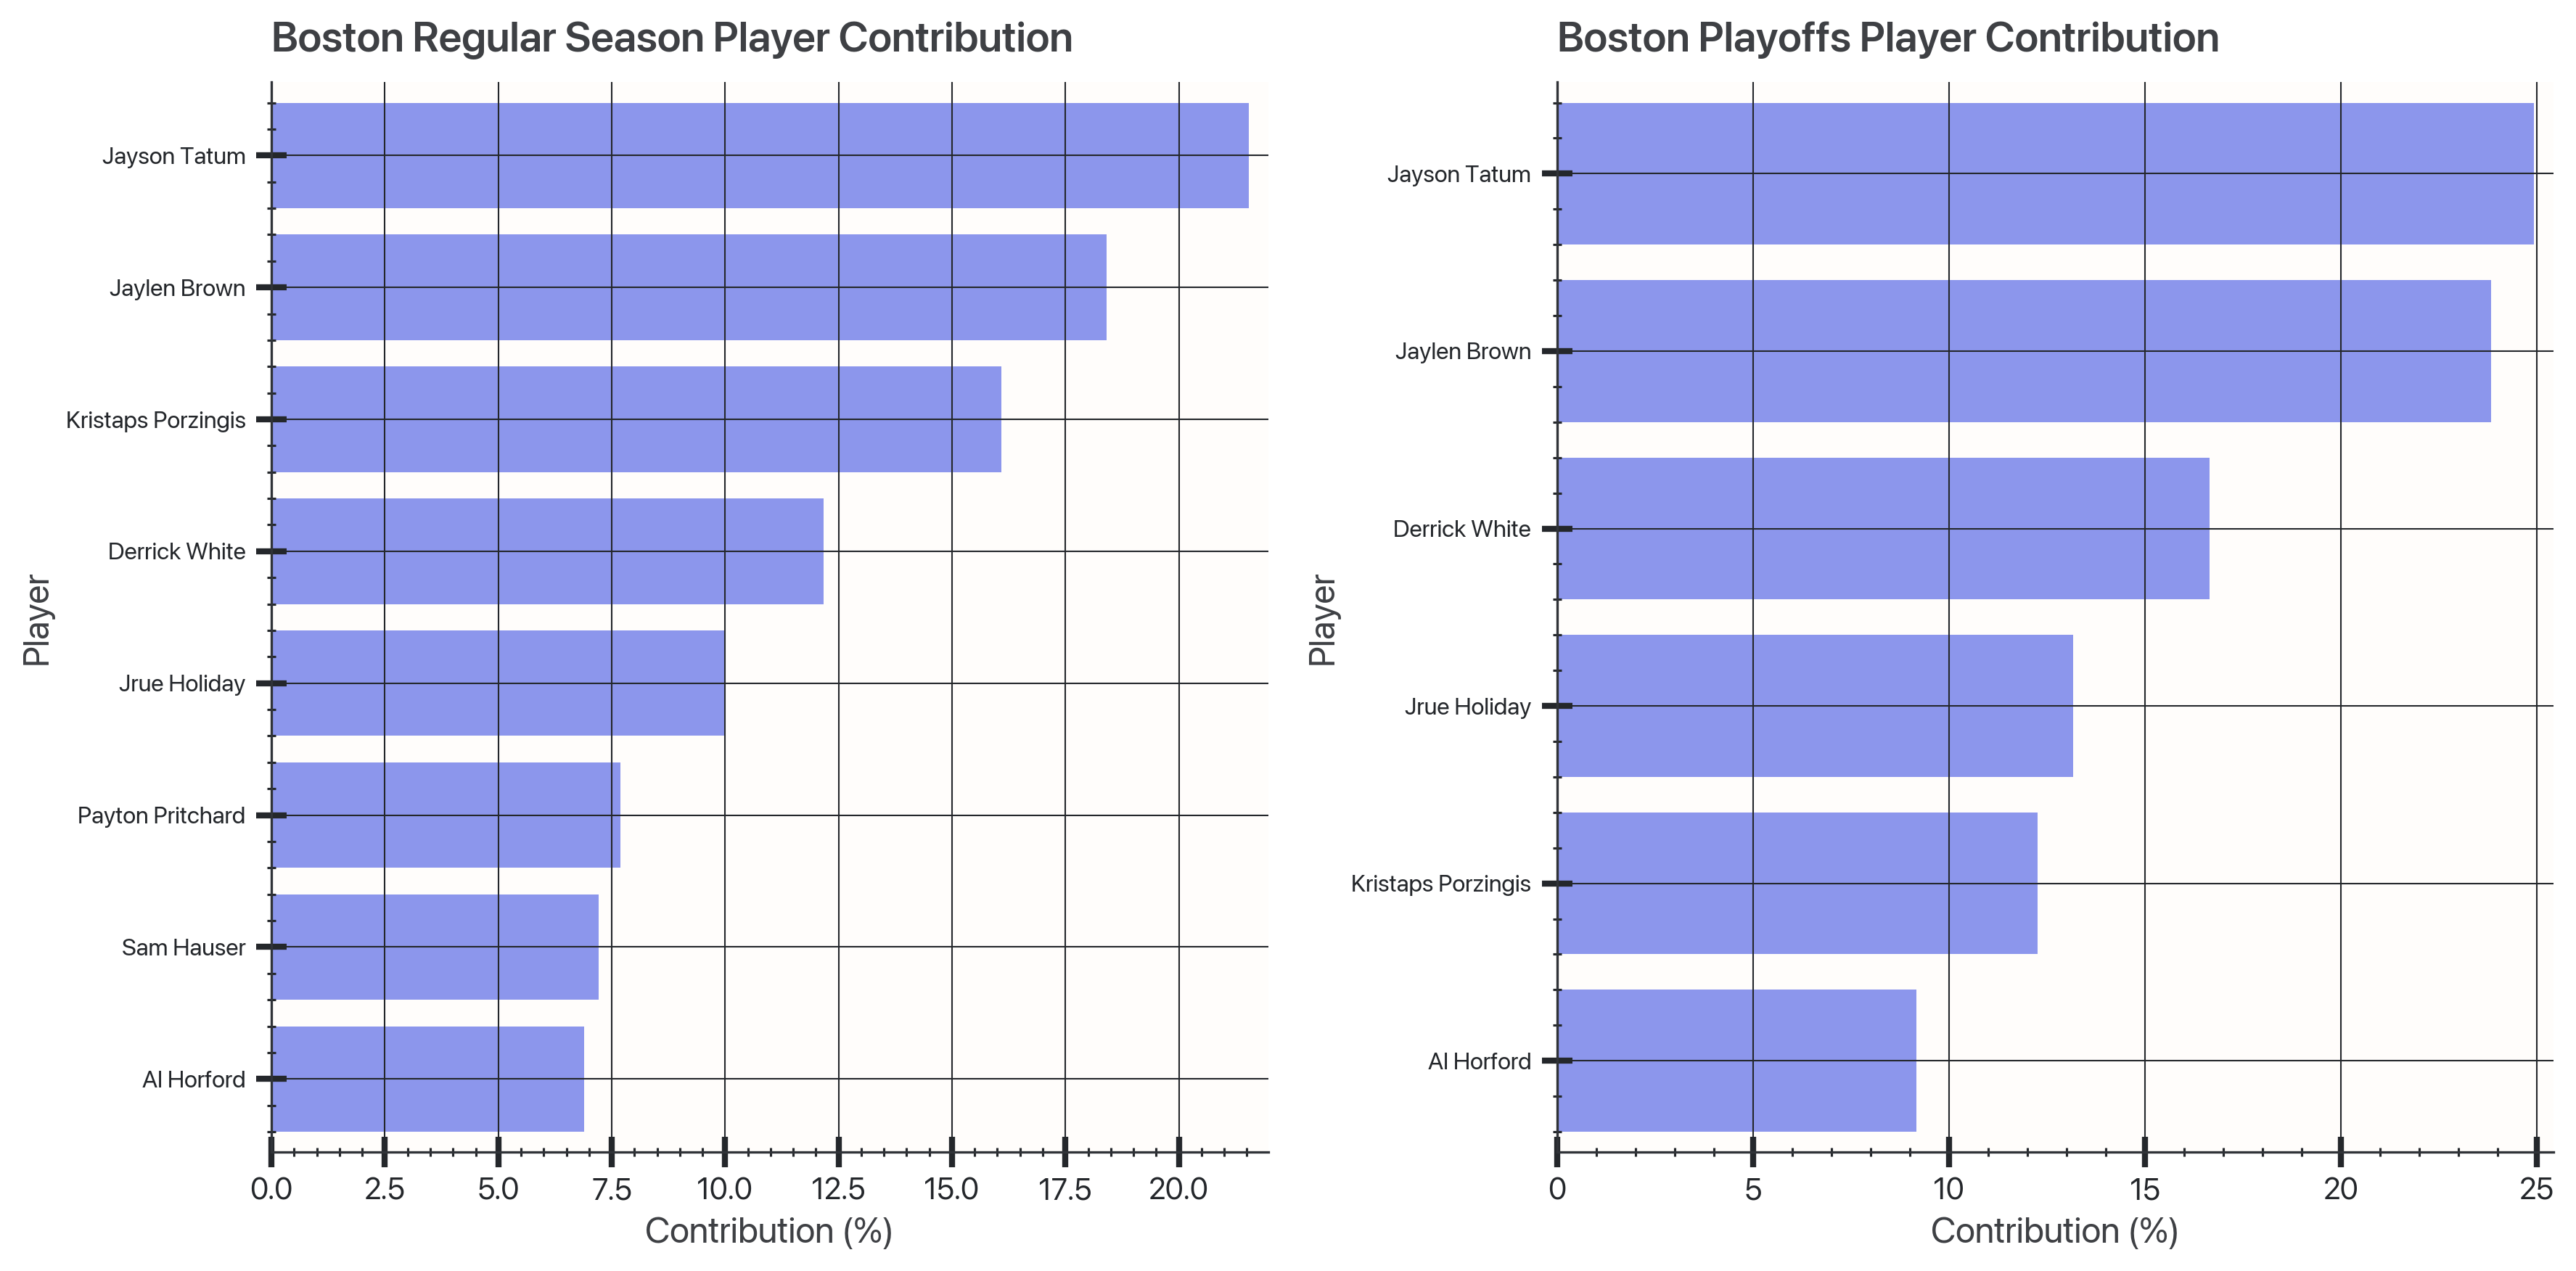

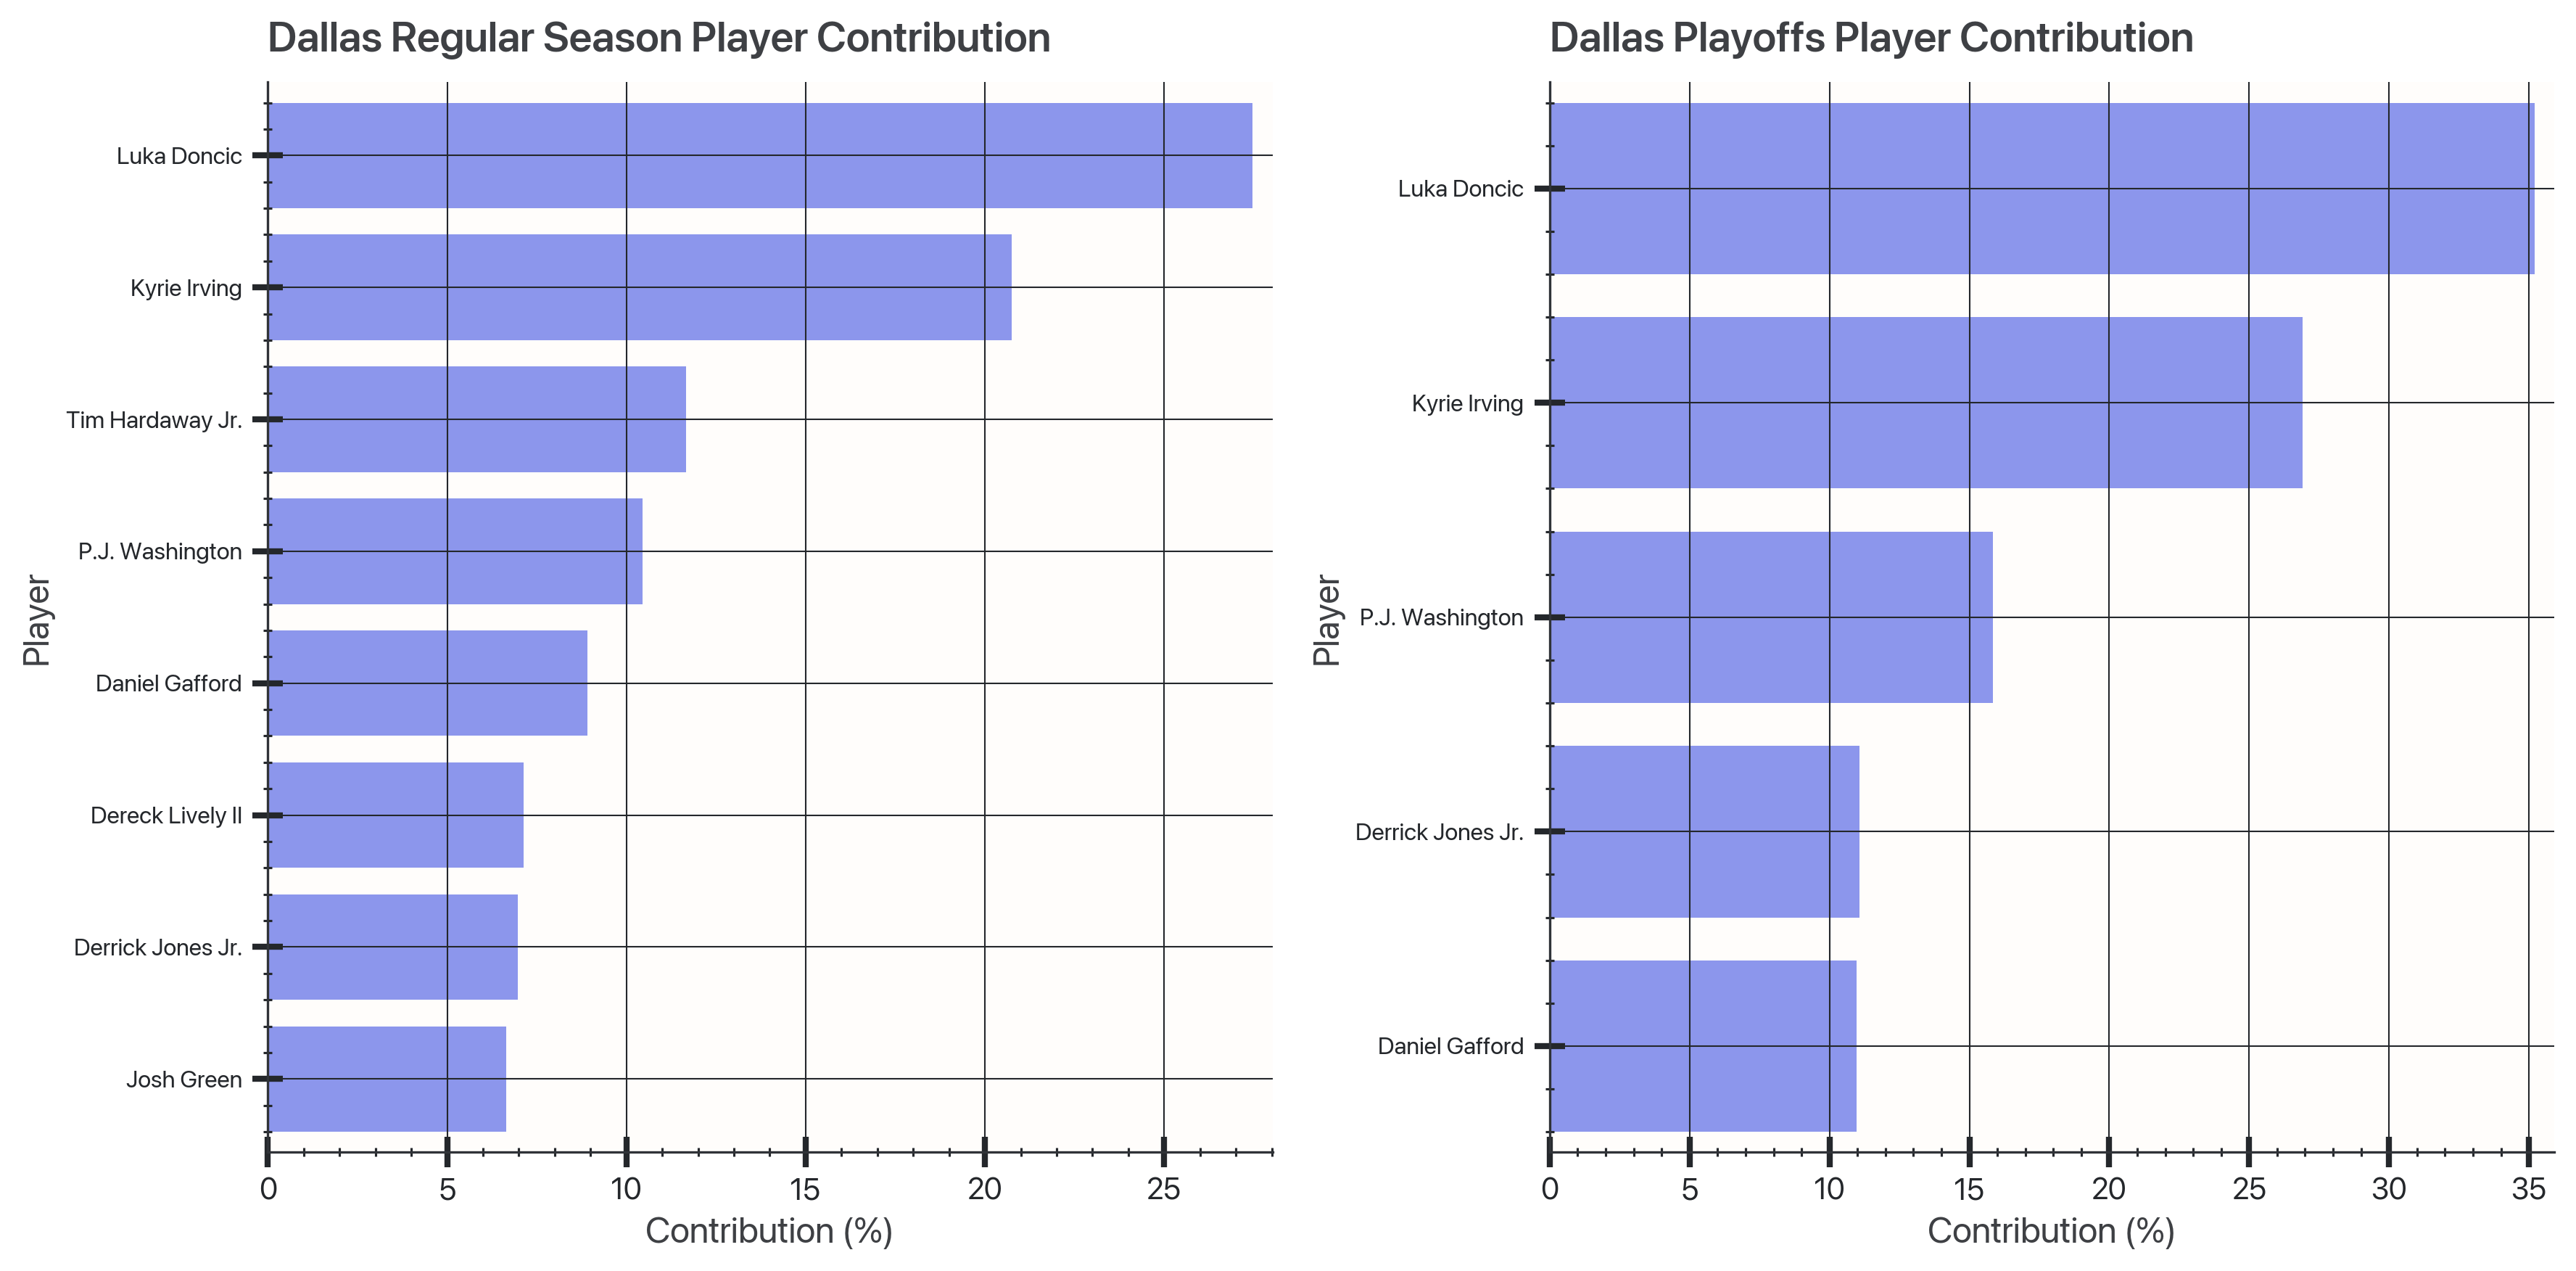

In [145]:
# Calculate thresholds, then assign team data.
# Create functions to avoid redunancy: data_filtering and bar_chart_data.
# Finally, create the whole bar chart.

thresholds = {
    'reg_bos': reg_bos['PTS'].sum() * 0.05,
    'pla_bos': reg_bos['PTS'].sum() * 0.05,
    'reg_dal': reg_bos['PTS'].sum() * 0.05,
    'pla_dal': reg_bos['PTS'].sum() * 0.05
}

teams_data = {
    'Boston': {'reg': reg_bos, 'pla': pla_bos},
    'Dallas': {'reg': reg_dal, 'pla': pla_dal}
}

def filtering_data(df, team, threshold):
    filt_df = df[df['TEAM'] == team] # Gets the team data.
    filt_df = filt_df[filt_df['PTS'] >= threshold]
    filt_df = filt_df[filt_df['NAME'] != 'Other']
    filt_df['Percentage'] = (filt_df['PTS'] / filt_df['PTS'].sum()) * 100
    return filt_df.sort_values('Percentage', ascending=True)

def create_chart(ax, data, title):
    ax.barh(range(len(data)), data['Percentage'])
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data['NAME'], fontsize=8)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Contribution (%)')
    ax.set_ylabel('Player')

for team, data in teams_data.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    reg_data = filtering_data(data['reg'], team[:3].upper(), thresholds[f'reg_{team[:3].lower()}'])
    pla_data = filtering_data(data['pla'], team[:3].upper(), thresholds[f'pla_{team[:3].lower()}'])
    
    create_chart(ax1, reg_data, f'{team} Regular Season Player Contribution')
    create_chart(ax2, pla_data, f'{team} Playoffs Player Contribution')
    
    plt.tight_layout()
    plt.show()



Observing the data above, it's clear that the Celtics had a more balanced scoring distribution in the regular season, with 8 players contributing over 5% of the team's total points. This suggests they had a little more depth and scoring options compared to the Mavericks, who had 7 key players. In the playoffs, both teams saw a slight drop in the number of key contributors, with the Celtics having 7 and the Mavericks 6. This is common as rotations typically tighten in the postseason. However, in both cases, their highest-scorers remained consistent.

The Celtics' top players were Jayson Tatum and Jaylen Brown in both the regular season and playoffs. Kristaps Porzingis was a key contributor in the regular season but saw his role diminish in the playoffs.
For the Mavericks, Luka Doncic and Kyrie Irving were the clear top options, with their contributions increasing in the playoffs. Tim Hardaway Jr. was a key regular season contributor but had a reduced role in the postseason.

Overall, the data suggests the Celtics had a more balanced scoring distribution, with their players maintaining their regular season production in the playoffs. The Mavericks were more reliant on their star duo of Doncic and Irving, with a larger portion of their scoring coming from those two.

In [147]:
conn.close()

### Conclusion

This analysis project only observed a fraction of the statistics required to get the most accurate picture. On a surface-level, it seems like the Mavericks were the better team, but that is primarily attributed to Dončić's supercharged playstyle which in a sense, carried his team. Looking back at the player contribution chart, the Maverick's role players such as P.J. Washington and Derrick Jones underperformed compared to teh Celtics' players, who had a fairly consistent output throughout from their starters.

In Game 5 of the Finals, the Mavericks' had their two star key players, Dončić and Irving, shut-down thanks to the Celtics' Brown and Tatum duo. Once their star players were handled, the Celtics were able to effectively use their efficient scoring techniques, solid roster, and team cohesion to their advantage, ultimately winning the Finals. While the data was analyzed to the best of my abilities, this will likely be a project (or style of project) I'll revisit in the future, taking into account of more dynamic details such as injury reports, topographic heatmaps of the court, and the conditions of other powerhouse teams.